# Adding details to plots

## The plot() function and its options

### Some options can or must be specified globally

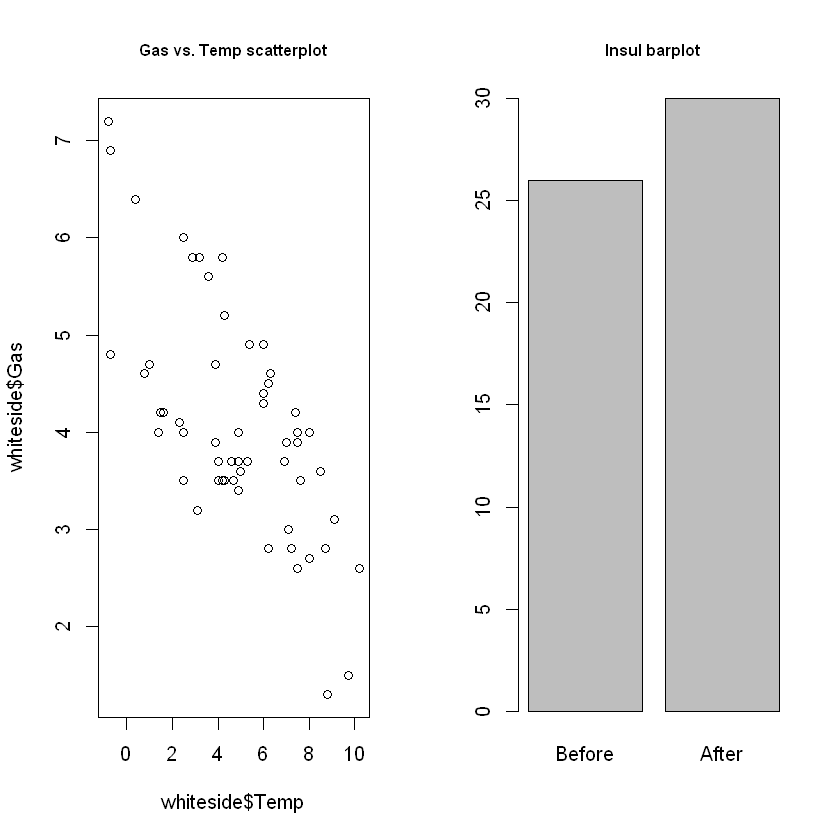

In [5]:
library(MASS)

par(mfrow = c(1, 2)) # mfrow specified globally
par(cex.main = 0.8)  # cex.main specified either locally or globally

plot(whiteside$Temp, whiteside$Gas)
title("Gas vs. Temp scatterplot")

plot(whiteside$Insul)
title("Insul barplot")

### Other options ca only specified locally

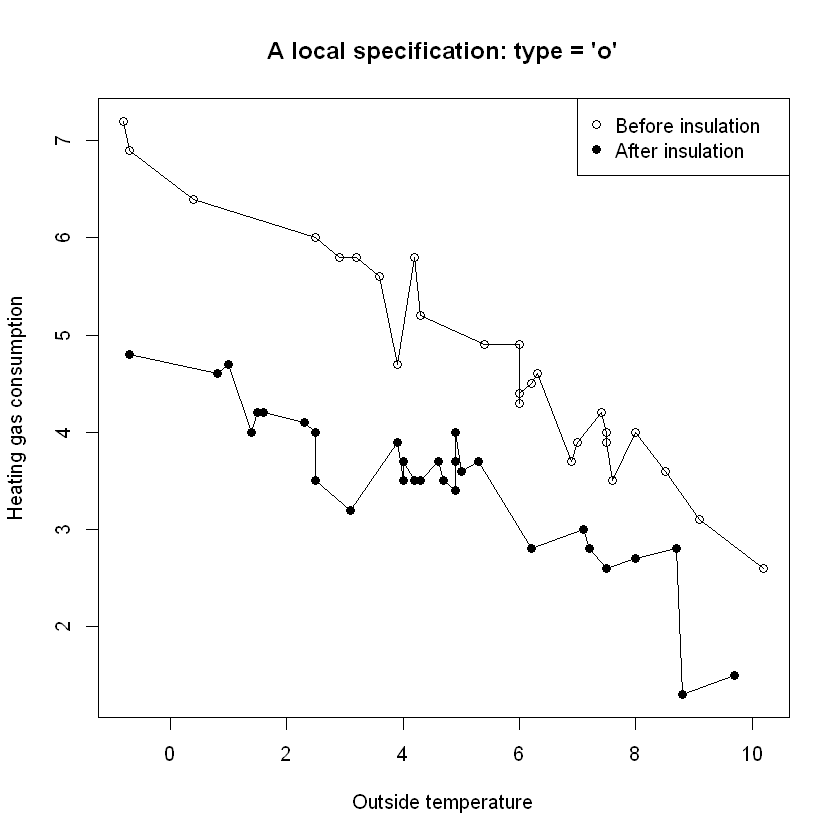

In [13]:
library(MASS)

indexA <- which(whiteside$Insul == "After")
indexB <- which(whiteside$Insul == "Before")

x <- whiteside$Temp
y <- whiteside$Gas

plot(x[indexA], y[indexA], type = "o", pch = 16,
    xlim = range(x), ylim = range(y),
    xlab = "Outside temperature",
    ylab = "Heating gas consumption") # high-level function, a base plot

lines(x[indexB], y[indexB], type = "o", pch = 1) #low-level function, details added to a base plot
legend("topright", pch = c(1, 16),
      legend = c("Before insulation", "After insulation"))
title("A local specification: type = 'o'")

### Introduction to the par() function

You already saw how the mfrow parameter to the par() function could be used to plot multiple graphs in one pane. The par() function also allows you to set many other graphics parameters, whose values will remain in effect until they are reset by a subsequent par() call.

Specifically, a call to the par() function with no parameters specified will return a list whose element names each specify a graphics parameter and whose element values specify the corresponding default values of these parameters. These parameters may be set by a call in the form par(name = value) where name is the name of the parameter to be set and value is the value to be assigned to this parameter.

The purpose of this exercise is to give an idea of what these graphics parameters are. In the subsequent exercises we'll show how some of these parameters can be used to enhance plot results.

INSTRUCTIONS

* Capture the return from the par() function as the character vector plot_pars.
* Show the names of these graphics parameters by calling names() on plot_pars.
* Show the number of parameters in this list by calling length().

In [14]:
# Assign the return value from the par() function to plot_pars
plot_pars <- par()

# Display the names of the par() function's list elements
names(plot_pars)

# Display the number of par() function list elements
length(plot_pars)

[1] "xlog"      "ylog"      "adj"       "ann"       "ask"       "bg"       
 [7] "bty"       "cex"       "cex.axis"  "cex.lab"   "cex.main"  "cex.sub"  
[13] "cin"       "col"       "col.axis"  "col.lab"   "col.main"  "col.sub"  
[19] "cra"       "crt"       "csi"       "cxy"       "din"       "err"      
[25] "family"    "fg"        "fig"       "fin"       "font"      "font.axis"
[31] "font.lab"  "font.main" "font.sub"  "lab"       "las"       "lend"     
[37] "lheight"   "ljoin"     "lmitre"    "lty"       "lwd"       "mai"      
[43] "mar"       "mex"       "mfcol"     "mfg"       "mfrow"     "mgp"      
[49] "mkh"       "new"       "oma"       "omd"       "omi"       "page"     
[55] "pch"       "pin"       "plt"       "ps"        "pty"       "smo"      
[61] "srt"       "tck"       "tcl"       "usr"       "xaxp"      "xaxs"     
[67] "xaxt"      "xpd"       "yaxp"      "yaxs"      "yaxt"      "ylbias"

[1] 72

### Exploring the type option

One of the important graphics parameters that can be set with the par() function is mfrow, which specifies the numbers of rows and columns in an array of plots. Valid values for this parameter are two-element numerical vectors, whose first element specifies the number of rows in the plot array and the second element specifies the number of rows.

A more detailed discussion of using the mfrow parameter is given in Chapter 4 of this course. For now, note that to specify a plot array with three rows and one column, the command would be par(mfrow = c(3, 1)).

The following exercise also introduces the type parameter for the plot() command, which specifies how the plot is drawn. The specific type values used here are:

    - "p" for "points"
    - "l" for "lines"
    - "o" for "overlaid" (i.e., lines overlaid with points)
    - "s" for "steps"

INSTRUCTIONS

*  Use the par() function to set the mfrow parameter for a two-by-two plot array.
* Generate a plot of brain weights from the Animals2 data frame, with observations plotted as points and the title "points" by calling the title() function.
* Repeat, with observations plotted as lines and the title "lines".
* Repeat, with observations plotted as overlaid points and lines and the title "overlaid".
* Repeat, with observations plotted as steps and the title "steps".

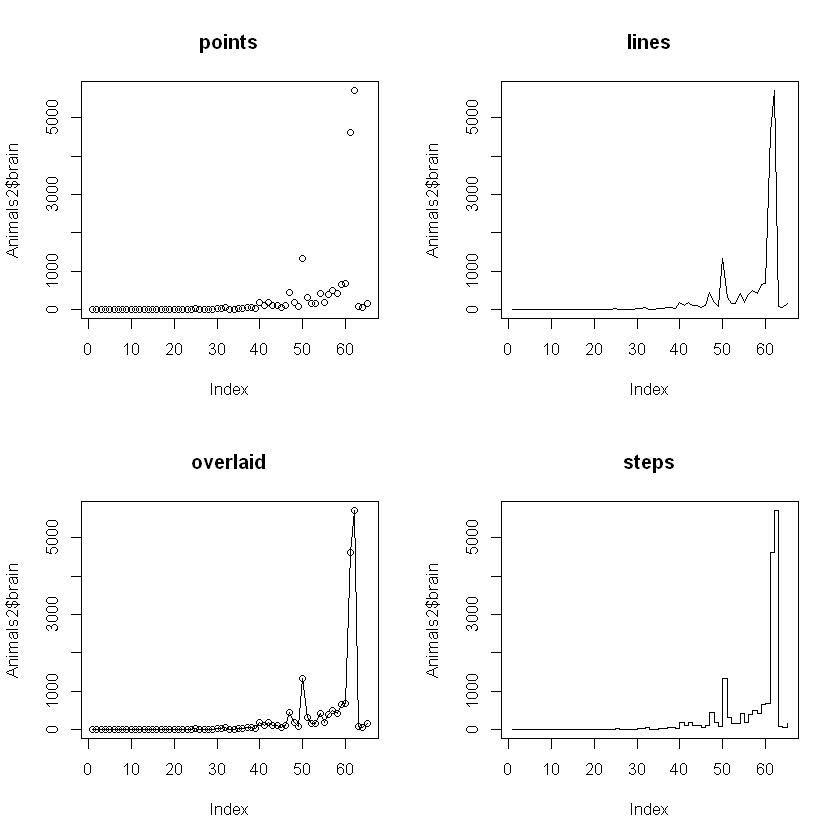

In [16]:
library(robustbase)

# Set up a 2-by-2 plot array
par(mfrow = c(2, 2))

# Plot the Animals2 brain weight data as points
plot(Animals2$brain, type = "p")

# Add the title
title("points")

# Plot the brain weights with lines
plot(Animals2$brain, type = "l")

# Add the title
title("lines")

# Plot the brain weights as lines overlaid with points
plot(Animals2$brain, type = "o")

# Add the title
title("overlaid")

# Plot the brain weights as steps
plot(Animals2$brain, type = "s")

# Add the title
title("steps")

### The surprising utility of the type "n" option

The type = "n" option was discussed in the video and this exercise provides a simple example. This option is especially useful is when we are plotting data from multiple sources on a common set of axes. In such cases, we can compute ranges for the x- and y-axes so that all data points will appear on the plot, and then add the data with subsequent calls to points() or lines() as appropriate.

This exercise asks you to generate a plot that compares mileage vs. horsepower data from two different sources: the mtcars data frame in the datasets package and the Cars93 data frame in the MASS package. To distinguish the different results from these data sources, the graphics parameter pch is used to specify point shapes. See ?points for a comprehensive list of some pch values and their corresponding point shapes.

INSTRUCTIONS

* Compute max_hp as the maximum of Horsepower from the Cars93 data frame and hp from the mtcars data frame.
* Compute max_mpg as the maximum of MPG.city from the Cars93 data frame, MPG.highway from this data frame, and mpg from the mtcars data frame.
* Using the type = "n" option, set up a plot with an x-axis that runs from zero to max_hp and a y-axis that runs from zero to max_mpg, with labels Horsepower and Miles per gallon.
* Using the points() function, add mpg vs. hp from the mtcars data frame to the plot as open circles (pch = 1).
* Using the points() function, add MPG.city vs. Horsepower to the plot as solid squares (refer to the plot of pch values).
* Using the points() function, add MPG.highway vs. Horsepower to the plot as open triangles pointing upwards (refer to the plot of pch values).

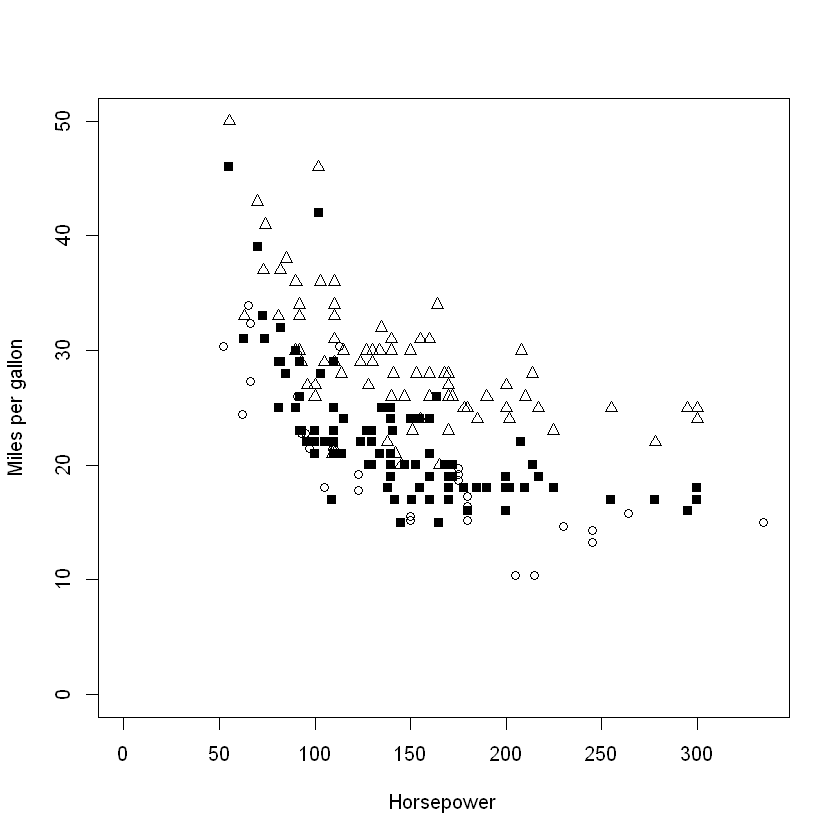

In [17]:
# Compute max_hp
max_hp <- max(Cars93$Horsepower, mtcars$hp)

# Compute max_mpg
max_mpg <- max(Cars93$MPG.city, Cars93$MPG.highway, mtcars$mpg)

# Create plot with type = "n"               
plot(max_hp, max_mpg,
     type = "n", xlim = c(0, max_hp),
     ylim = c(0, max_mpg), xlab = "Horsepower",
     ylab = "Miles per gallon")

# Add open circles to plot
points(mtcars$hp, mtcars$mpg, pch = 1)

# Add solid squares to plot
points(Cars93$Horsepower, Cars93$MPG.city, pch = 15)

# Add open triangles to plot
points(Cars93$Horsepower, Cars93$MPG.highway, pch = 2)

## Adding lines and points to plots

### Using the points() function to add points to a plot

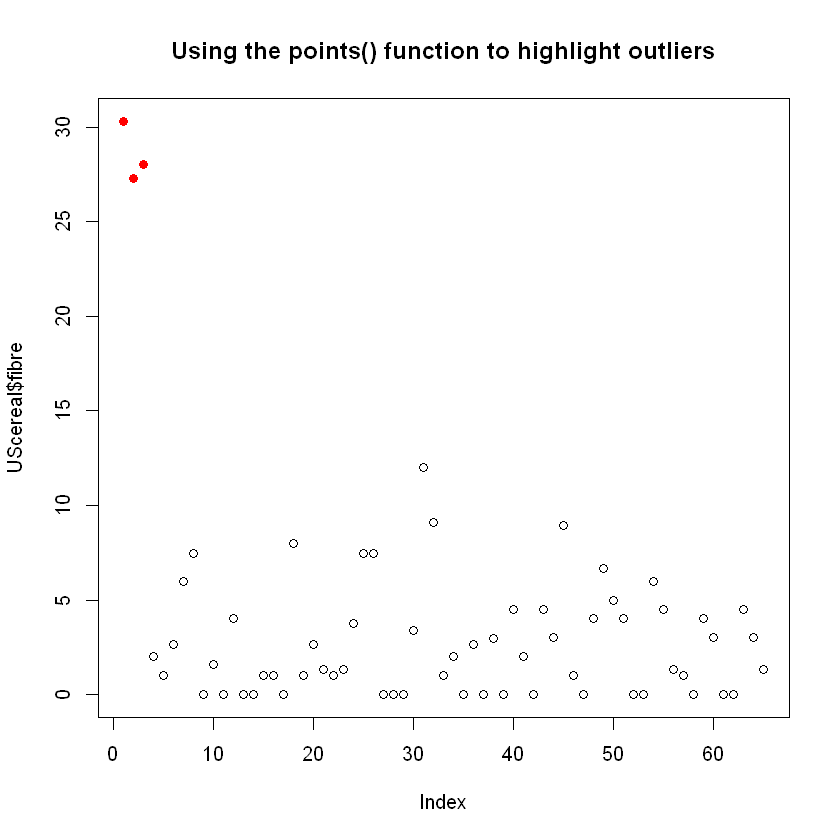

In [18]:
library(MASS)

plot(UScereal$fibre)

index <- which(UScereal$fibre > 20)
points(index, UScereal$fibre[index], pch = 16, col = "red")
title("Using the points() function to highlight outliers")

### A refresher

### Using the lines() function to add lines to a plot

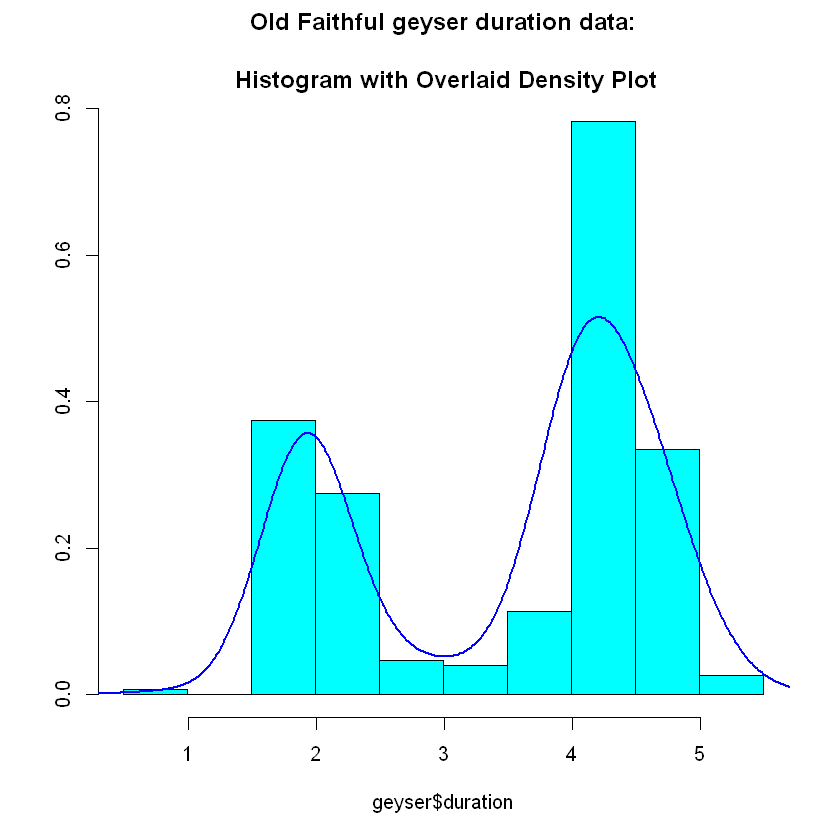

In [19]:
library(MASS)

truehist(geyser$duration)
lines(density(geyser$duration), lwd = 2, col = "blue")
title("Old Faithful geyser duration data:
       \n Histogram with Overlaid Density Plot")

### Using the abline() function to add lines to a plot

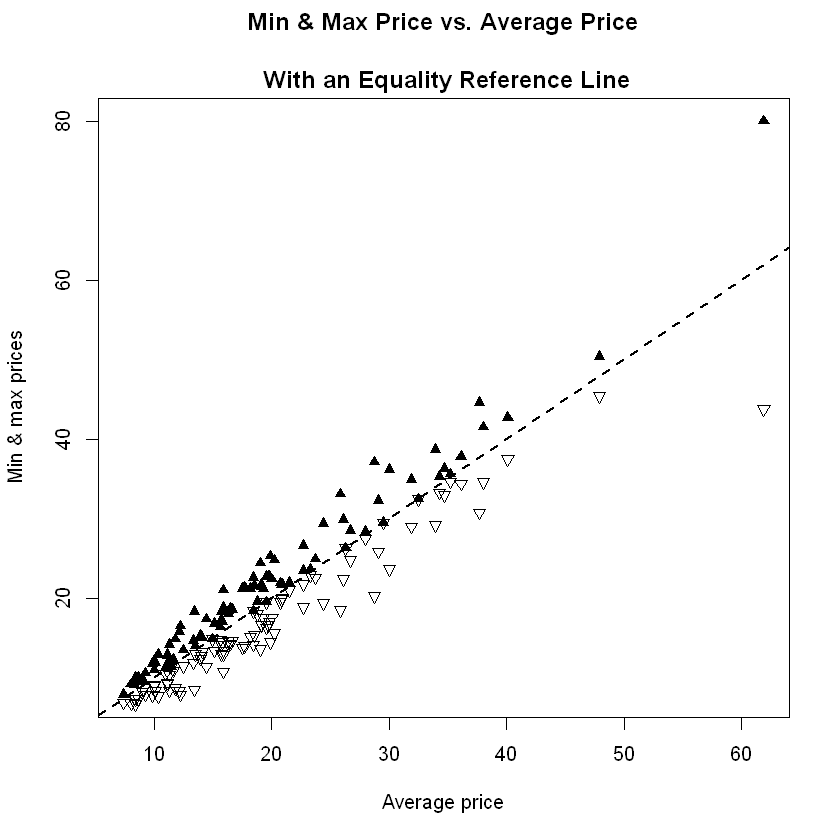

In [20]:
library(MASS)

plot(Cars93$Price, Cars93$Max.Price, pch = 17,
    xlab = "Average price", ylab = "Min & max prices")
points(Cars93$Price, Cars93$Min.Price, pch = 6)
abline(a = 0, b = 1, lty = 2, lwd = 2)

title("Min & Max Price vs. Average Price
       \n With an Equality Reference Line")

### The lines() function and line types

As noted in Chapter 2, numerical data is often assumed to conform approximately to a Gaussian probability distribution, characterized by the bell curve. One point of this exercise is to show what this bell curve looks like for exactly Gaussian data and the other is to show how the lines() function can be used to add lines to an existing plot.

The curves you are asked to draw here have the same basic shape but differ in their details (specifically, the means and standard deviations of these Gaussian distributions are different). For this reason, it is useful to draw these curves with different line types to help us distinguish them.

Note that line types are set by the lty argument, with the default value lty = 1 specifying solid lines, lty = 2 specifying dashed lines, and lty = 3 specifying dotted lines. Also note that the lwd argument specifies the relative width.


INSTRUCTIONS

* Create a numerical variable x with 200 evenly-spaced values from 0 to 10.
* Using the dnorm() function, generate a vector gauss1 of Gaussian probability densities for this range of x values, with mean 2 and standard deviation 0.2.
* Using the dnorm() function, generate a vector gauss2 of Gaussian probability densities for this range of x values, with mean 4 and standard deviation 0.5.
* Generate a plot of gauss1 vs. x with lines and a y-axis label "Gaussian probability density".
* Using the lines() function, add a second dashed line for gauss2 vs. x with relative width 3 (refer to the line type plot to select the lty parameter).

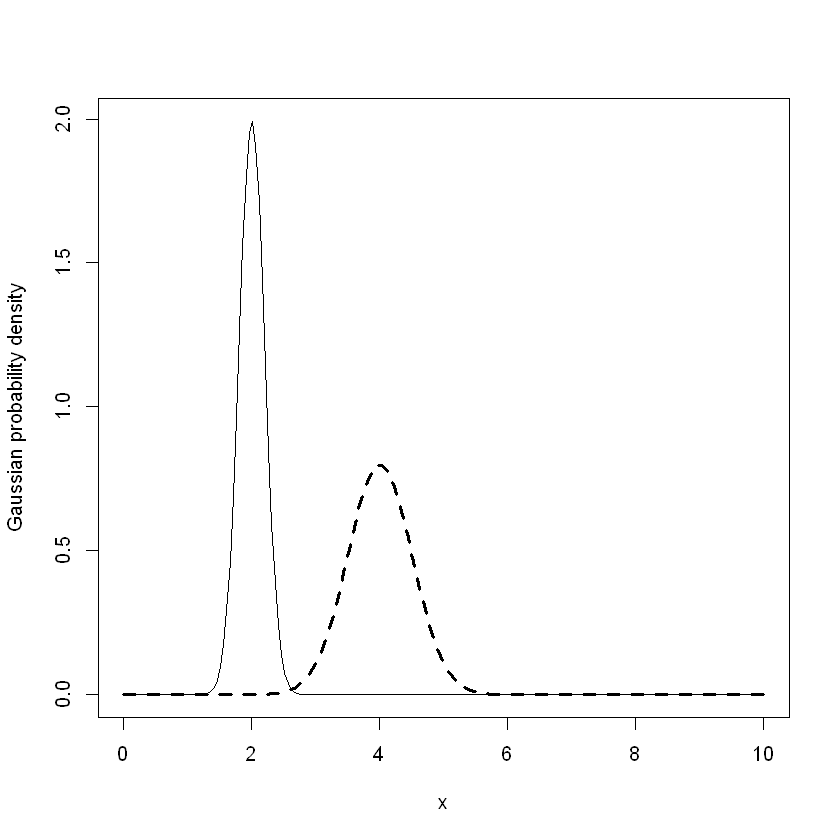

In [21]:
# Create the numerical vector x
x <- seq(0, 10, length = 200)

# Compute the Gaussian density for x with mean 2 and standard deviation 0.2
gauss1 <- dnorm(x, mean = 2, sd = 0.2)

# Compute the Gaussian density with mean 4 and standard deviation 0.5
gauss2 <- dnorm(x, mean = 4, sd = 0.5)

# Plot the first Gaussian density
plot(x = x, y = gauss1, type = "l", ylab = "Gaussian probability density")

# Add lines for the second Gaussian density
lines(x, gauss2, lty = 2, lwd = 3)

### The points() function and point types

One advantage of specifying the pch argument locally is that, in a call to functions like plot() or points(), local specification allows us to make pch depend on a variable in our dataset. This provides a simple way of indicating different data subsets with different point shapes or symbols.

This exercise asks you to generate two plots of mpg vs. hp from the mtcars data frame in the datasets package. The first plot specifies the point shapes using numerical values of the pch argument defined by the cyl variable in the mtcars data frame. The second plot illustrates the fact that pch can also be specified as a vector of single characters, causing each point to be drawn as the corresponding character.

INSTRUCTIONS

* Create an empty plot of mpg vs. hp using the type = "n" option from the mtcars data frame, with axis labels "Horsepower" and "Gas mileage".
* Using the points() function, add the mpg vs. hp data, with pch specified by the numeric values of cyl.
* Repeat both of the previous steps, except with pch specified by the character values of cyl.

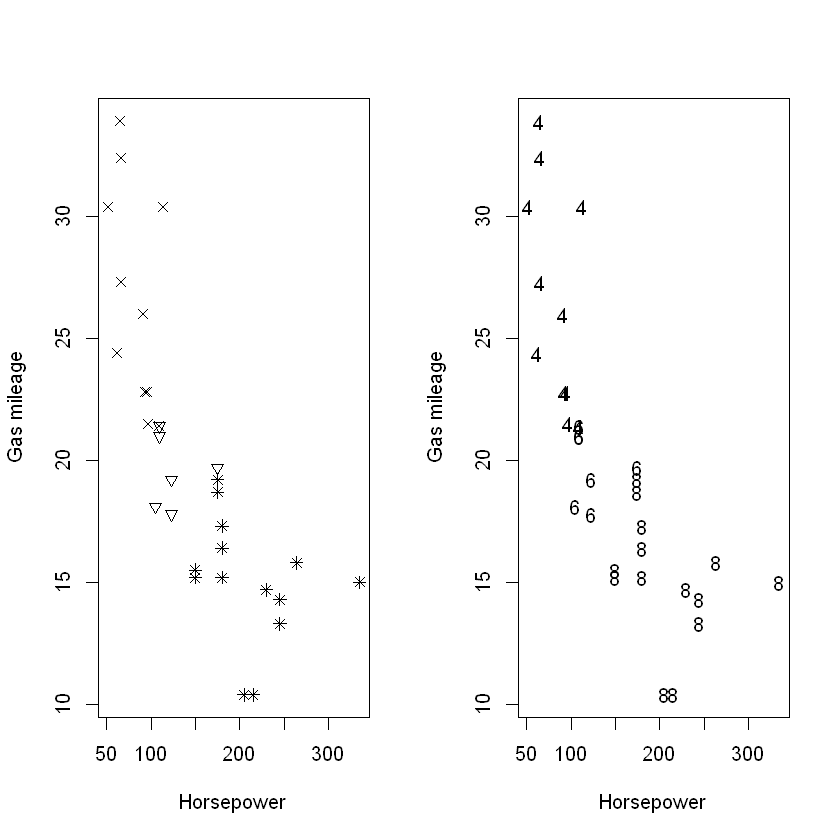

In [22]:
par(mfrow = c(1, 2))

# Create an empty plot using type = "n"
plot(mtcars$hp, mtcars$mpg, type = "n", xlab = "Horsepower", ylab = "Gas mileage")

# Add points with shapes determined by cylinder number
points(mtcars$hp, mtcars$mpg, pch = mtcars$cyl)

# Create a second empty plot
plot(mtcars$hp, mtcars$mpg, type = "n", xlab = "Horsepower", ylab = "Gas mileage")

# Add points with shapes as cylinder characters
points(mtcars$hp, mtcars$mpg, pch = as.character(mtcars$cyl))

### Adding trend lines from linear regression models

The low-level plot function abline() adds a straight line to an existing plot. This line is specified by an intercept parameter a and a slope parameter b, and the simplest way to set these parameters is directly. For example, the command abline(a = 0, b = 1) adds an equality reference line with zero intercept and unit (i.e. 1) slope: points for which y = x fall on this reference line, while points with y > x fall above it, and points with y < x fall below it.

An alternative way of specifying these parameters is through a linear regression model that determines them from data. One common application is to generate a scatterplot of y versus x, then fit a linear model that predicts y from x, and finally call abline() to add this best fit line to the plot.

This exercise asks you to do this for the Gas versus Temp data from the whiteside data frame in the MASS package. The standard R function that fits linear regression models is lm(), which supports the formula interface. Thus, to fit a linear model that predicts y from x in the data frame df, the call would be lm(y ~ x, data = df). This call returns a linear model object, which can then be passed as an argument to the abline() function to draw the desired line on our plot.

INSTRUCTIONS

* Use the lm() function to create linear_model, a linear regression model that predicts Gas from Temp from the whiteside data frame.
* Generate a scatterplot of Gas vs. Temp.
* Using the abline() function, add a dashed reference line that shows the predictions of linear_model.

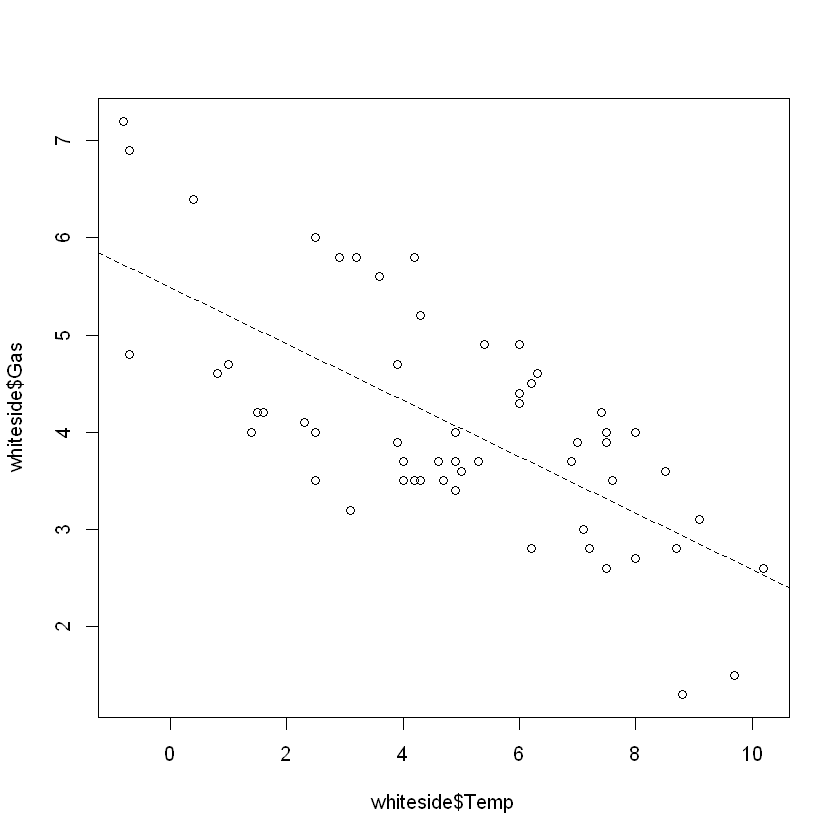

In [23]:
# Build a linear regression model for the whiteside data
linear_model <- lm(Gas ~ Temp, data = whiteside)

# Create a Gas vs. Temp scatterplot from the whiteside data
plot(whiteside$Temp, whiteside$Gas)

# Use abline() to add the linear regression line
abline(linear_model, lty = 2)

## Adding text to plots

* Two important aspects of a good datavisualization:
    1. A plot format that is well matched to the data being displayed
    2. Sufficient explanatory text to make it clear what we are looking at
    
### Explanatory text

* Axis labels: xlab(), ylab()
* Titles: title(), main = 
* Legends
* Text in plot itself: text(x, y, labels, adj)

### Overriding default titles

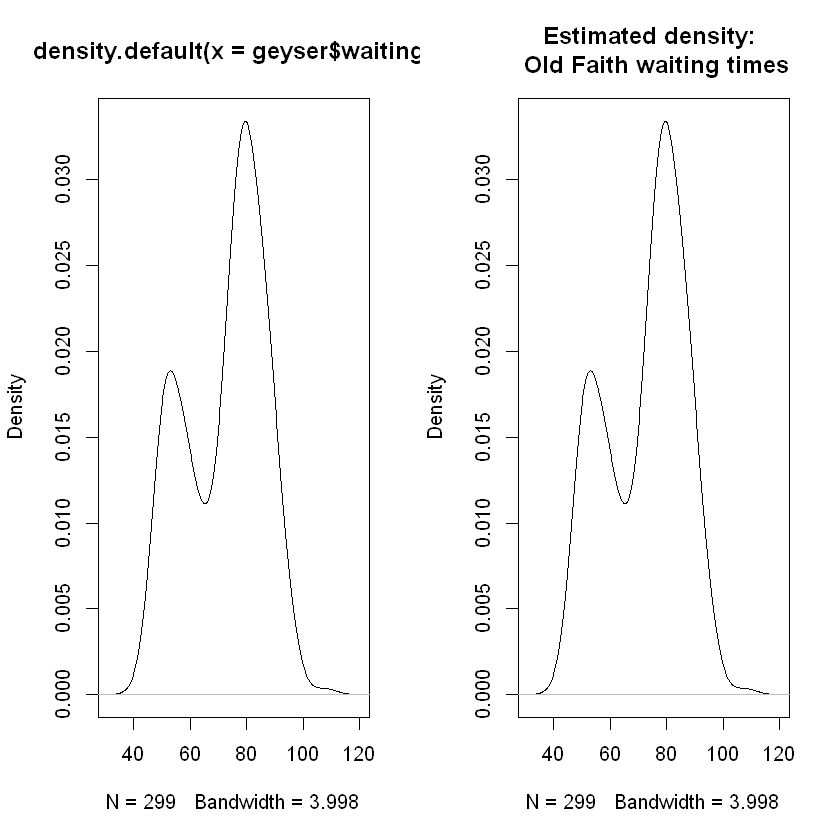

In [24]:
library(MASS)

par(mfrow = c(1, 2))

plot(density(geyser$waiting))
plot(density(geyser$waiting),
    main = "Estimated density: \n Old Faith waiting times")

### Adding explanatory text to a plot

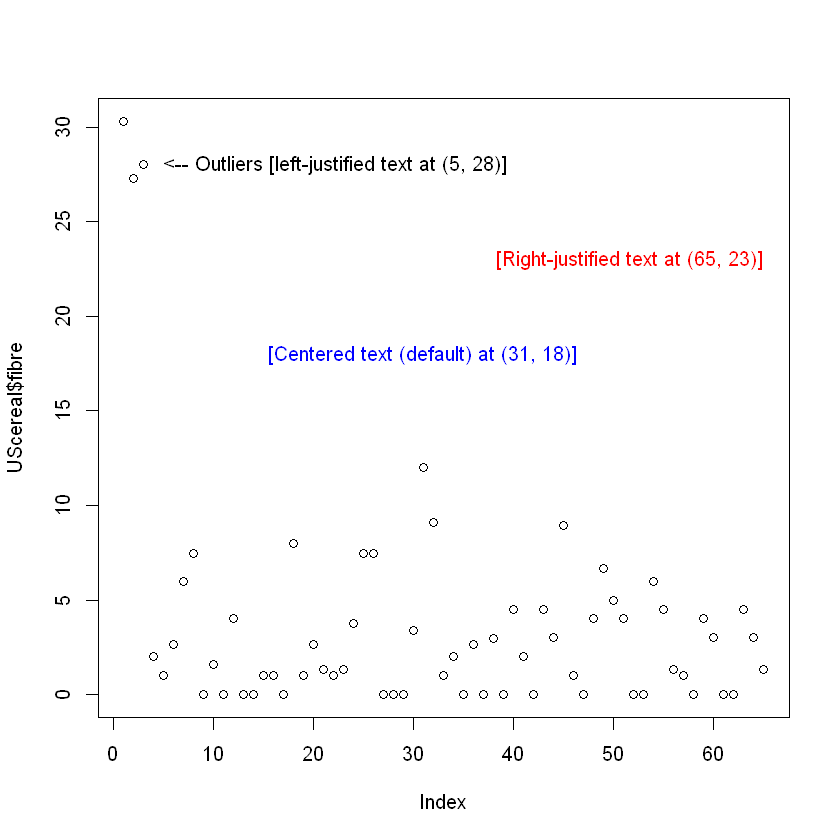

In [25]:
library(MASS)

plot(UScereal$fibre)
text(5, 28, "<-- Outliers [left-justified text at (5, 28)]", adj = 0)
text(65, 23, "[Right-justified text at (65, 23)]", adj = 1,
    col = "red")
text(31, 18, "[Centered text (default) at (31, 18)]", col = "blue")

### Varying fonts, orientations, and other text features

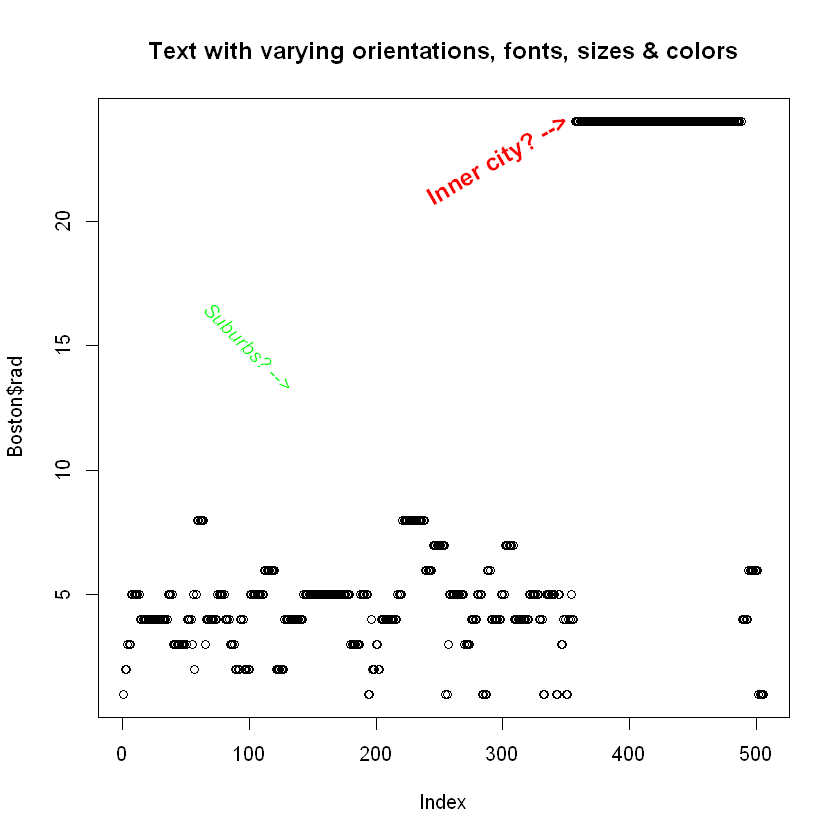

In [26]:
library(MASS)

plot(Boston$rad)
text(350, 24, adj = 1, "Inner city? -->", srt = 30, font = 2,
    cex = 1.2, col = "red")
text(100, 15, "Suburbs? -->", srt = -45, font = 3, col = "green")
title("Text with varying orientations, fonts, sizes & colors")

### Using the text() function to label plot features

One of the main uses of the text() function is to add informative labels to a data plot. The text() function takes three arguments:

x, which specifies the value for the x variable,
y, which specifies the value for the y variable, and
label, which specifies the label for the x-y value pair.
This exercise asks you to first create a scatterplot of city gas mileage versus horsepower from the Cars93 data, then identify an interesting subset of the data (i.e. the 3-cylinder cars) and label these points. You will find that assigning a vector to the x, y, and label arguments to text() will result in labeling multiple points at once.

INSTRUCTIONS

* Create a scatterplot of MPG.city vs. Horsepower from the Cars93 data frame, with points represented as solid squares. Recall that the pch value for solid squares is 15.
* Create the variable index3 using the which() function that identifies all 3-cylinder cars.
* Label the Make of each 3-cylinder car in the Cars93 data frame using the text() function. Use the adj argument to specify left-justified text in your labels.
* Use the zoom feature in the Plots window to see this plot more clearly.

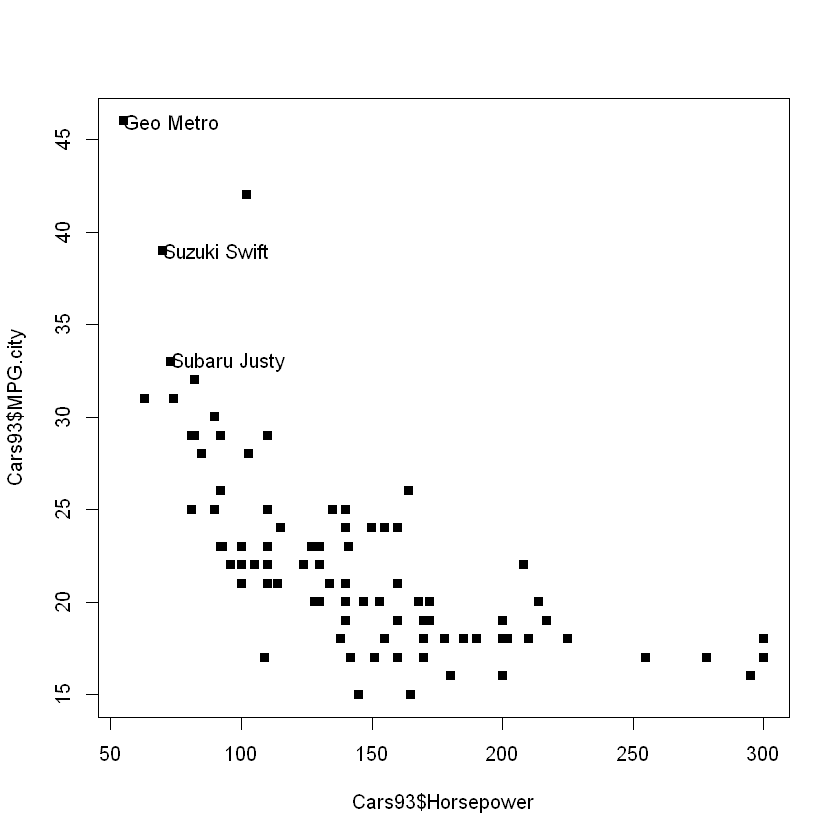

In [27]:
# Create MPG.city vs. Horsepower plot with solid squares
plot(Cars93$Horsepower, Cars93$MPG.city, pch = 15)

# Create index3, pointing to 3-cylinder cars
index3 <- which(Cars93$Cylinders == 3)

# Add text giving names of cars next to data points
text(x = Cars93$Horsepower[index3], 
     y = Cars93$MPG.city[index3],
     labels = Cars93$Make[index3], adj = 0)

### Adjusting text position, size, and font

The previous exercise added explanatory text to a scatterplot. The purpose of this exercise is to improve this plot by modifying the text placement, increasing the text size, and displaying the text in boldface.

It was noted that the adj argument to the text() function determines the horizontal placement of the text and it can take any value between 0 and 1. In fact, this argument can take values outside this range. That is, making this value negative causes the text to start to the right of the specified x position. Similarly, making adj greater than 1 causes the text to end to the left of the x position.

Another useful optional argument for the text() function is cex, which scales the default text size. As a specific example, setting cex = 1.5 increases the text size by 50 percent, relative to the default value. Similarly, specifying cex = 0.8 reduces the text size by 20 percent.

Finally, the third optional parameter used here is font, which can be used to specify one of four text fonts: font = 1 is the default text font (neither italic nor bold), font = 2 specifies bold face text, font = 3 specifies italic text, and font = 4 specifies both bold and italic text.

INSTRUCTIONS

* Create a plot of MPG.city vs. Horsepower from the Cars93 data frame, with data represented as open circles.
* Construct the variable index3 using the which() function that identifies the row numbers containing all 3-cylinder cars.
* Use the points() function to overlay solid circles on top of all points in the plot that represent 3-cylinder cars.
* Use the text() function with the Make variable as before to add labels to the right of the 3-cylinder cars, but now use adj = -0.2 to move the labels further to the right, use the cex argument to increase the label size by 20 percent, and use the font argument to make the labels bold italic.

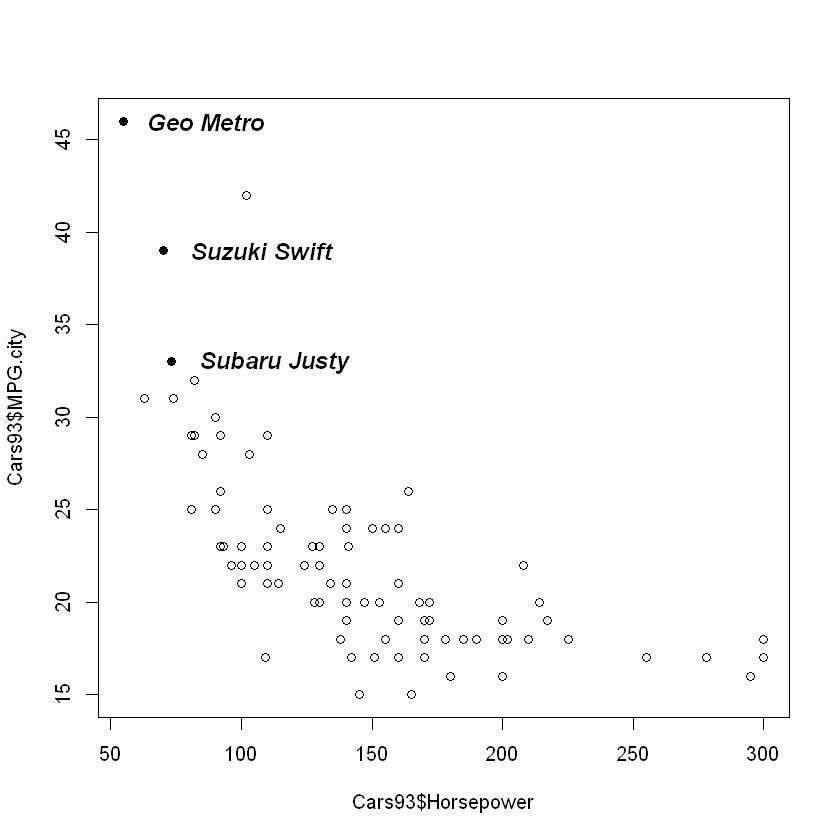

In [28]:
# Plot MPG.city vs. Horsepower as open circles
plot(Cars93$Horsepower, Cars93$MPG.city, pch = 1)

# Create index3, pointing to 3-cylinder cars
index3 <- which(Cars93$Cylinders == 3)

# Highlight 3-cylinder cars as solid circles
points(Cars93$Horsepower[index3], Cars93$MPG.city[index3], pch = 16)

# Add car names, offset from points, with larger bold text
text(Cars93$Horsepower[index3], Cars93$MPG.city[index3],
     Cars93$Make[index3], adj = -0.2, cex = 1.2, font = 4)

### Rotating text with the srt argument

In addition to the optional arguments used in the previous exercises, the text() function also supports a number of other optional arguments that can be used to enhance the text. This exercise uses the cex argument to reduce the text size and introduces two new arguments. The first is the col argument that specifies the color used to display the text, and the second is the srt argument that allows us to rotate the text.

Color has been used in several of the previous exercises to specify point colors, and the effective use of color is discussed further in Chapter 5. One of the points of this exercise is to show that the specification of text color with the text() function is essentially the same as the specification of point color with the plot() function. As a specific example, setting col = "green" in the text() function causes the text to appear in green. If col is not specified, the text appears in the default color set by the par() function, which is typically black.

The srt parameter allows us to rotate the text through an angle specified in degrees. The typical default value (set by the par() function) is 0, causing the text to appear horizontally, reading from left to right. Specifying srt = 90 causes the text to be rotated 90 degrees counter-clockwise so that it reads from bottom to top instead of left to right.

INSTRUCTIONS

* Create a scatterplot of Gas vs. Temp from the whiteside data frame, as solid triangles.
* Use the which() function to create a vector indexB that points to all data observations with Insul having the value "Before".
* Use the which() function to create a vector indexA that points to all data observations with Insul having the value "After".
* Use the text() function to overlay the text "Before" on the appropriate points, in blue, rotated 30 degrees, reducing the text size to 80 percent of the default.
* Use the text() function to overlay the text "After" on the appropriate points, in red, rotated -20 degrees, reducing the text size to 80 percent of the default.

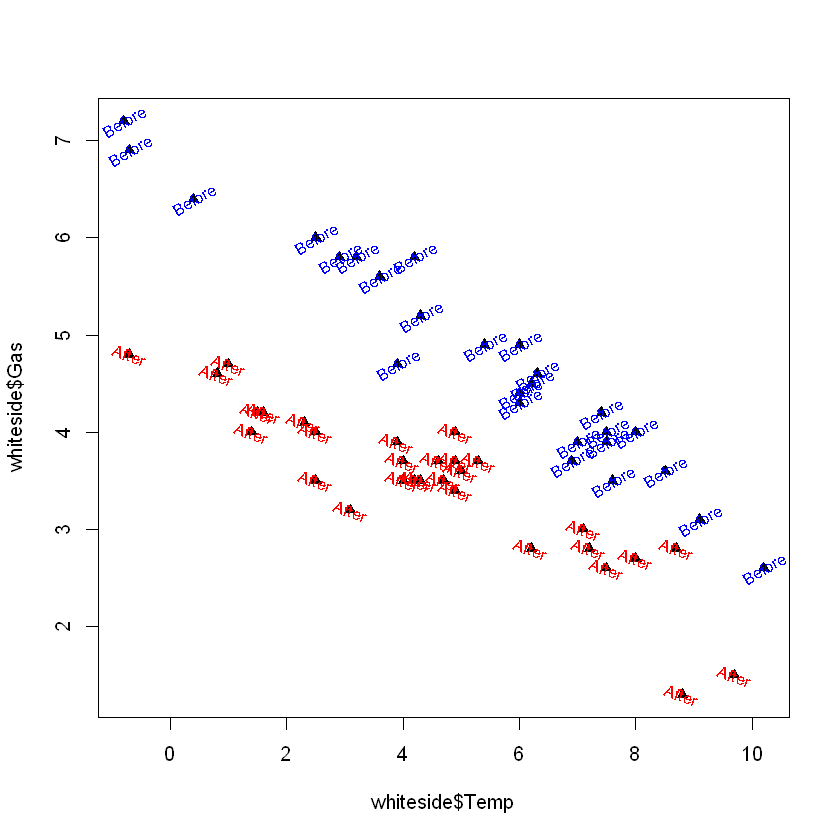

In [29]:
# Plot Gas vs. Temp as solid triangles
plot(whiteside$Temp, whiteside$Gas, pch = 17)

# Create indexB, pointing to "Before" data
indexB <- which(whiteside$Insul == "Before")

# Create indexA, pointing to "After" data
indexA <- which(whiteside$Insul == "After")

# Add "Before" text in blue, rotated 30 degrees, 80% size
text(x = whiteside$Temp[indexB], y = whiteside$Gas[indexB],
     labels = "Before", col = "blue", srt = 30, cex = 0.8)

# Add "After" text in red, rotated -20 degrees, 80% size
text(x = whiteside$Temp[indexA], y = whiteside$Gas[indexA],
     labels = "After", col = "red", srt = -20, cex = 0.8)

## Adding or modifying other plot details

### Adding legends to a plot

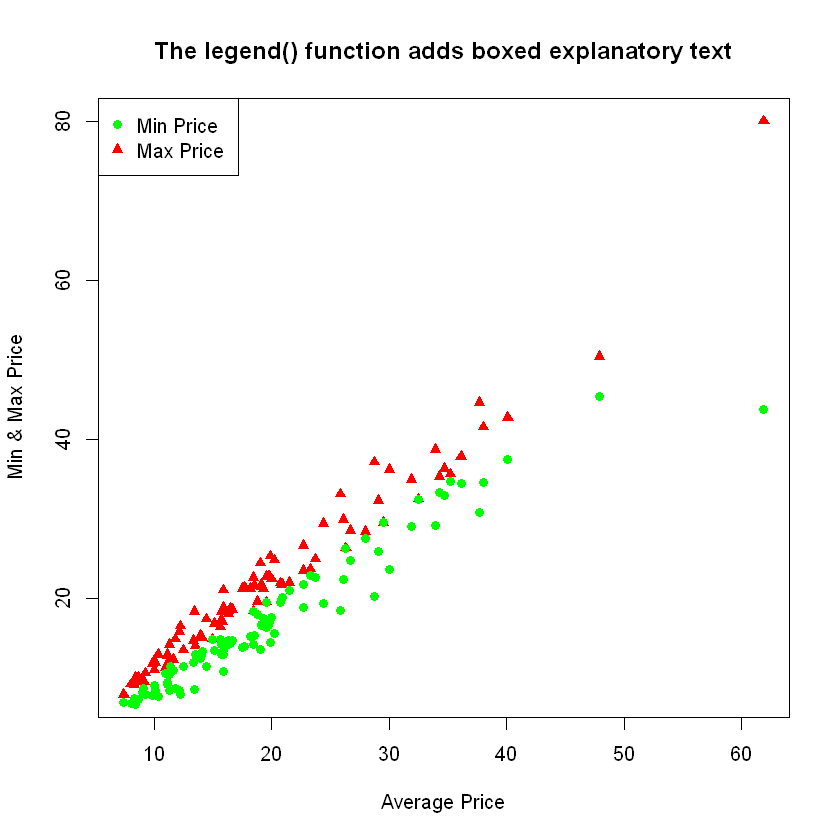

In [33]:
library(MASS)

plot(Cars93$Price, Cars93$Max.Price, pch = 17, col = "red",
    xlab = "Average Price", ylab = "Min & Max Price")
points(Cars93$Price, Cars93$Min.Price, pch = 16, col = "green")
legend(x = "topleft", pch = c(16, 17), col = c("green", "red"),
       legend = c("Min Price", "Max Price"))
title("The legend() function adds boxed explanatory text")

## Adding custom axes to a plot

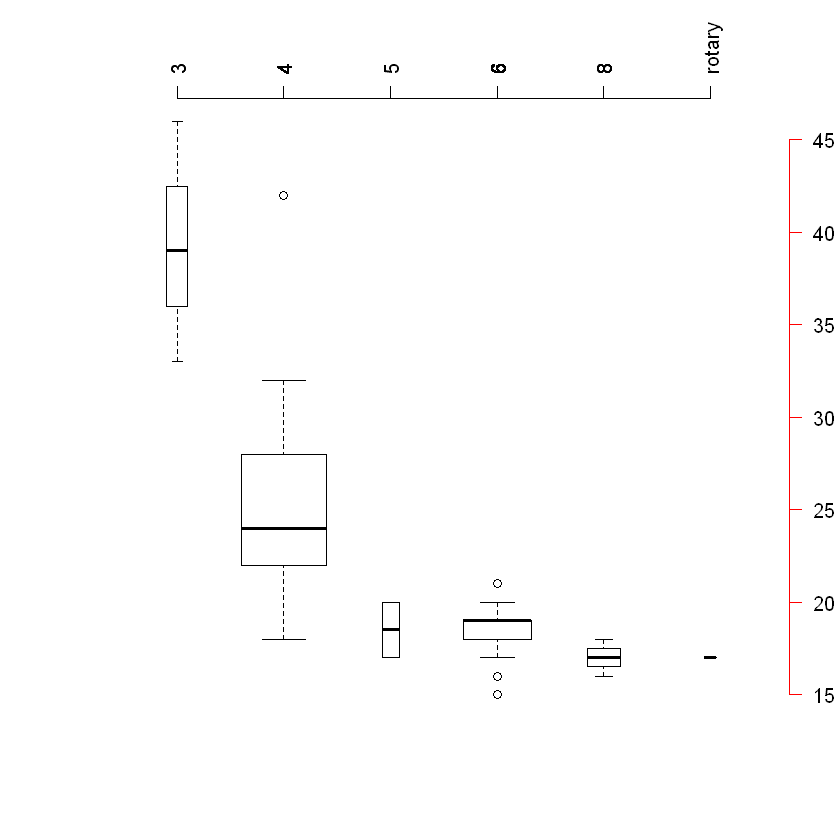

In [34]:
library(MASS)

boxplot(MPG.city ~ Cylinders, data = Cars93,
       varwidth = TRUE, axes = FALSE)

axis(side = 3, at = Cars93$Cylinders,
    labels = as.character(Cars93$Cylinders), las = 2) # las = 1: perpendicular
axis(side = 4, col = "red", las = 1) # las = 1 : horizontal

### Adding a smooth trend line

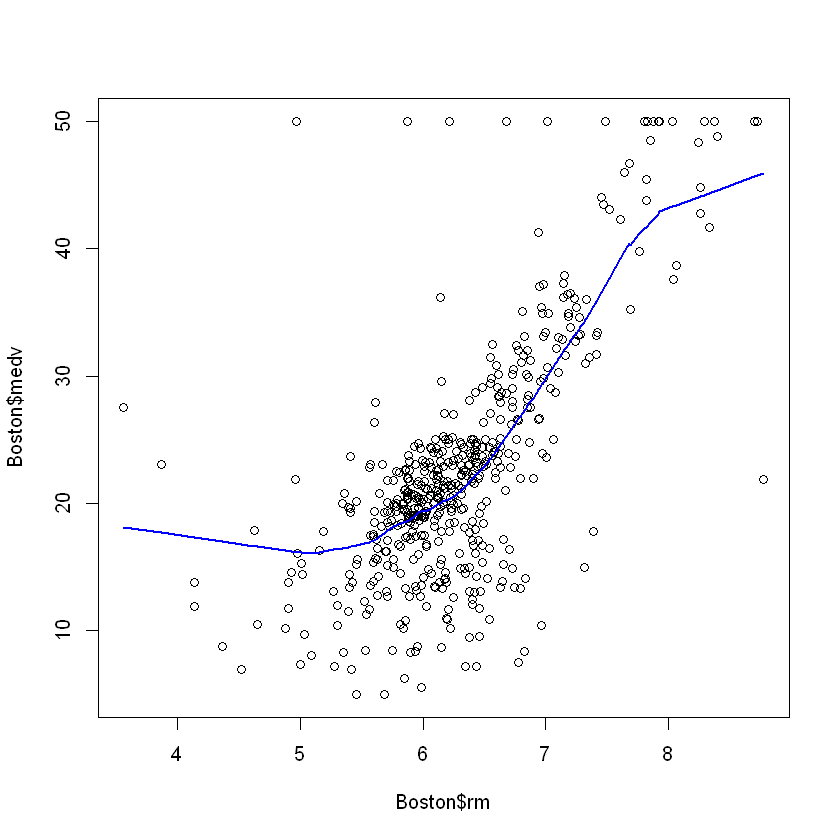

In [35]:
library(MASS)

plot(Boston$rm, Boston$medv)
trend <- supsmu(Boston$rm, Boston$medv)
lines(trend, lwd = 2, col = "blue")

### Using the legend() function

The video described and illustrated the use of the legend() function to add explanatory text to a plot.

This exercise asks you to first create a scatterplot and then use this function to add explanatory text for the point shapes that identify two different data subsets.

INSTRUCTIONS

* Set up a scatterplot of Gas vs. Temp from the whiteside data frame using type = "n" option in the plot() call. Label the x-axis "Outside temperature" by specifying the xlab argument and the y-axis "Heating gas consumption" by specifying the ylab argument.
* Use the which() function to create a vector indexB that points to all data observations with Insul having the value "Before".
* Use the which() function to create a vector indexA that points to all data observations with Insul having the value "After".
* Using the points() function, add the "Before" points to the plot, represented as solid triangles.
* Using the points() function, add the "After" points to the plot, represented as open circles.
* Using the legend() function, add a legend in the upper right corner of the plot with the names "Before" and "After" and the appropriate point shapes indicated.

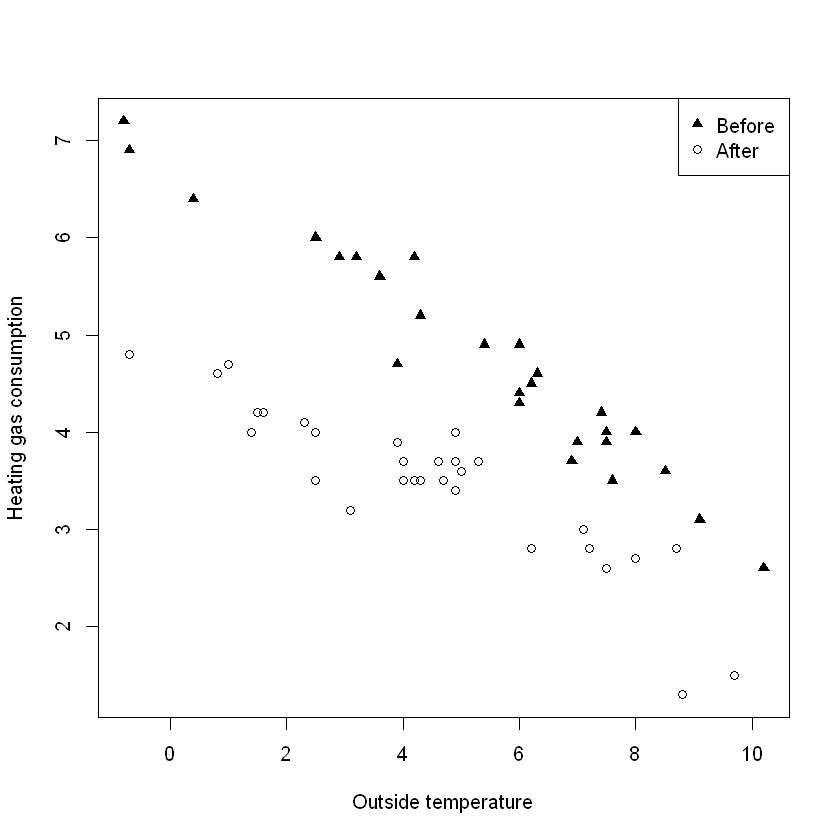

In [36]:
# Set up and label empty plot of Gas vs. Temp
plot(whiteside$Temp, whiteside$Gas,
     type = "n", xlab = "Outside temperature",
     ylab = "Heating gas consumption")

# Create indexB, pointing to "Before" data
indexB <- which(whiteside$Insul == "Before")

# Create indexA, pointing to "After" data
indexA <- which(whiteside$Insul == "After")

# Add "Before" data as solid triangles
points(whiteside$Temp[indexB], whiteside$Gas[indexB], pch = 17)

# Add "After" data as open circles
points(whiteside$Temp[indexA], whiteside$Gas[indexA], pch = 1)

# Add legend that identifies points as "Before" and "After"
legend("topright", pch = c(17, 1), 
       legend = c("Before", "After"))

### Adding custom axes with the axis() function

Typical base graphics functions like boxplot() provide x- and y-axes by default, with a label for the x-axis below the plot and one for the y-axis label to the left of the plot. These labels are generated automatically from the variable names used to generate the plot. Sometimes, we want to provide our own axes labels, and R makes this possible in two steps: first, we suppress the default axes when we create the plot by specifying axes = FALSE; then, we call the low-level graphics function axis() to create the axes we want.

In this exercise, you're asked to create your own labels using the axis() function with the side, at, and labels arguments. The side argument tells the function which axis to create: a value of 1 adds an axis below the plot; 2 adds an axis on the left; 3 puts it across the top; and 4 puts it on the right side. The second argument, at, is a vector that defines points where tick-marks will be drawn on the axis. The third argument, labels, is a vector that defines labels at each of these tick-marks.

One example of a boxplot with custom axes was presented in the video. This exercise asks you to create another example showing the relationship between the sugars variable and the shelf variable from the UScereal data frame in the MASS package.

INSTRUCTIONS

* Use the boxplot() function to create a boxplot of sugars vs. shelf from the UScereal data frame in the MASS package, with axes suppressed.
* Use the axis() function with the side parameter specified to add a y-axis label to the left of the box plot showing the range of sugars values.
* In your second call to axis(), add an x-axis label on the bottom side and specify the at parameter to add tick-marks at the numerical shelf values labelled 1, 2, and 3.
* In your third call to axis(), add another x-axis label at the top and specify the labels parameter to show the physical shelf locations ("floor", "middle", "top").

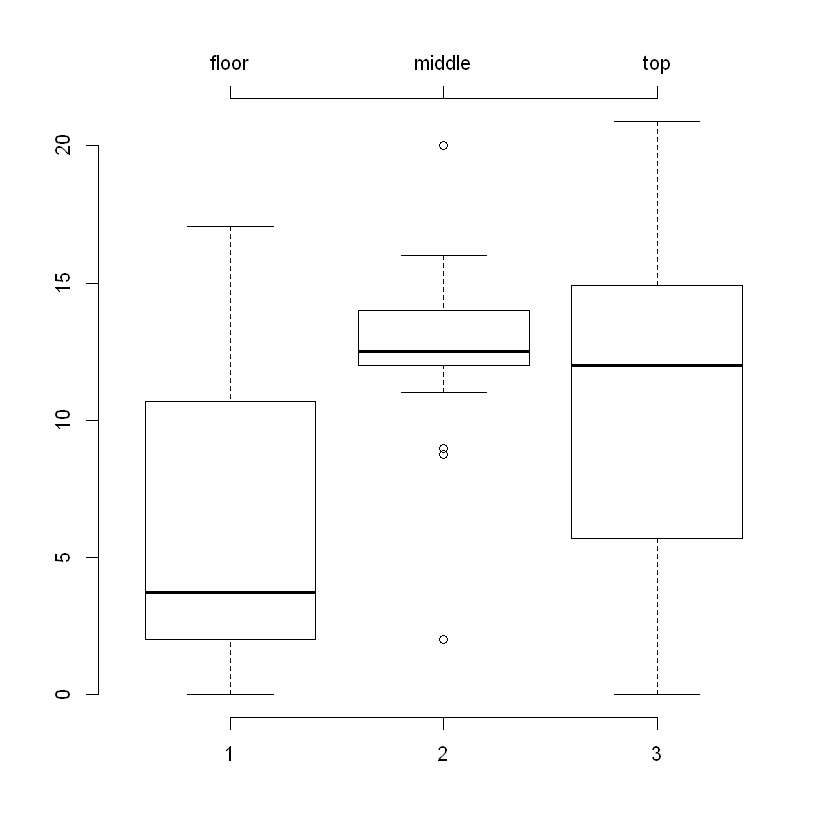

In [41]:
# Create a boxplot of sugars by shelf value, without axes
boxplot(sugars ~  shelf, data = UScereal, axes = FALSE)

# Add a default y-axis to the left of the boxplot
axis(side = 2)

# Add an x-axis below the plot, labelled 1, 2, and 3
axis(side = 1, at = 1:3)

# Add a second x-axis above the plot
axis(side = 3, at = 1:3,
     labels = c("floor", "middle", "top"))

### Using the supsmu() function to add smooth trend curves

As we saw in the video, some scatterplots exhibit fairly obvious trends that are not linear. In such cases, we may want to add a curved trend line that highlights this behavior of the data and the supsmu() function represents one way of doing this.

To use this function, we need to specify values for the required arguments x and y, but it also has a number of optional arguments. Here, we consider the optional bass argument, which controls the degree of smoothness in the resulting trend curve. The default value is 0, but specifying larger values (up to a maximum of 10) results in a smoother curve. This exercise asks you to use the supsmu() function to add two trend lines to a scatterplot, one using the default parameters and the other with increased smoothness.

INSTRUCTIONS

* Create a scatterplot of MPG.city vs. Horsepower from the Cars93 data frame.
* Create a supsmu() object named trend1 with the bass parameter at its minimum (default) value, 1.
* Use the lines() function to add the trend1 curve to the plot as a solid line. There is no need to provide additional arguments.
* Create a supsmu() object named trend2 with the bass parameter at its maximum value, 10.
* Use the lines() function to add the trend2 curve to the plot as a dotted line of twice standard width.

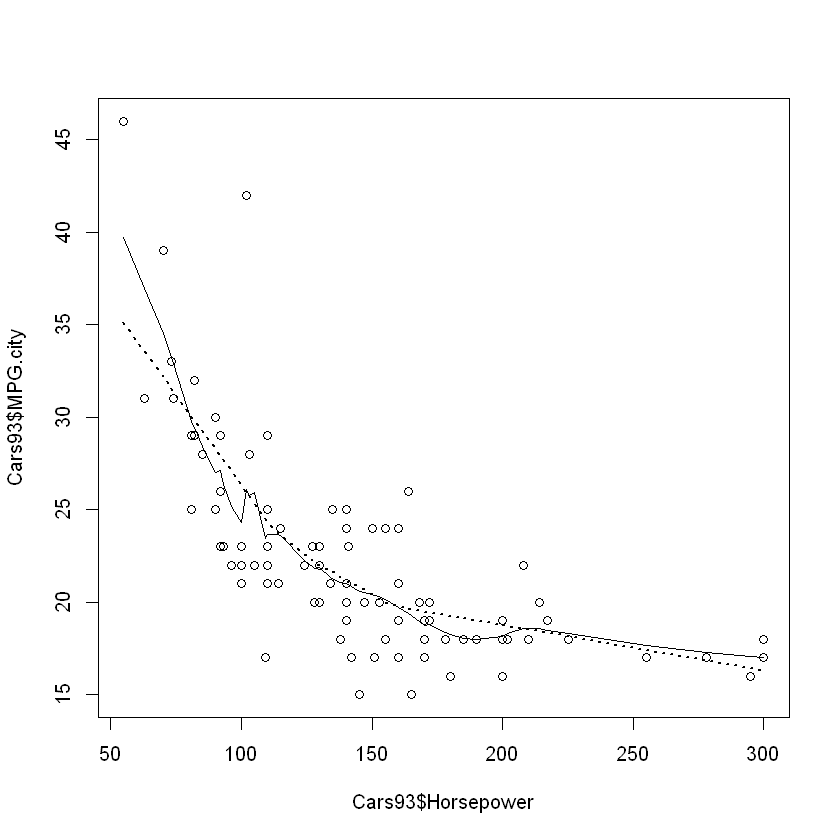

In [42]:
# Create a scatterplot of MPG.city vs. Horsepower
plot(Cars93$Horsepower , Cars93$MPG.city)

# Call supsmu() to generate a smooth trend curve, with default bass
trend1 <- supsmu(Cars93$Horsepower, Cars93$MPG.city)

# Add this trend curve to the plot
lines(trend1)

# Call supsmu() for a second trend curve, with bass = 10
trend2 <- supsmu(Cars93$Horsepower , Cars93$MPG.city, bass = 10)

# Add this trend curve as a heavy, dotted line
lines(trend2, lty = 3, lwd = 2)